In [310]:
import numpy as np
from scipy.linalg import khatri_rao as khatri_rao
from matplotlib import pyplot as plt
from functools import reduce

In [323]:
n = 50

def foo(i, j, k):
    return np.sin(i + j + k)

A = np.fromfunction(foo, [n, n, n]).astype(np.complex_)
d = len(A.shape)
R = 3

In [324]:
def tensor_unfold(A: np.array, k : int) -> np.array:
    """unfold tensor by dimension k

    Args:
        A (np.aray): of size (n1, n2, ..., nd)
        k (int): dimension for unfold

    Returns:
        aray: matrix (nk, -1)
    """    
    return np.reshape(np.moveaxis(A, k, 0), (A.shape[k], -1))

def restore_tensor_3d(factors):
    R = factors[0].shape[1]
    return sum([np.einsum("i,j,k", factors[0][:, i], factors[1][:, i], factors[2][:, i]) for i in range(R)])

In [331]:
def ALS(A, R, maxit=20):
    d = A.ndim
    factors = [np.random.normal(size = (A.shape[i], R)) for i in range(d)]
    temp = [None] * d
    errors = [[] for _ in range(d)]
    for it in range(maxit):
        for i in range(d):
            temp[i] = factors[i].copy()
            factors[i] = np.linalg.lstsq(reduce(khatri_rao, [factors[k] for k in range(d) if k != i]), tensor_unfold(A, i).T, rcond=-1)[0].T
            errors[i].append([np.linalg.norm(temp[i] - factors[i])])
    return factors, errors

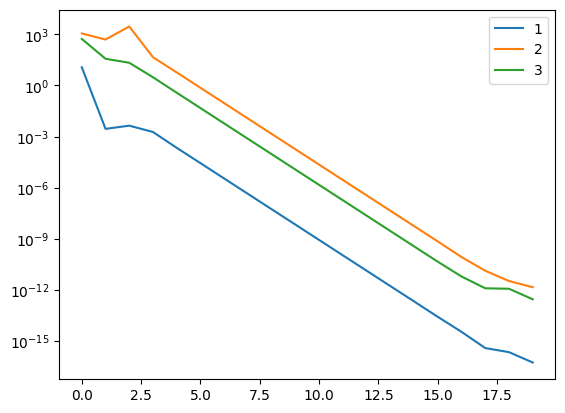

In [332]:
factors, errors = ALS(A, R)

plt.yscale('log')
plt.plot(errors[0], label='1')
plt.plot(errors[1], label='2')
plt.plot(errors[2], label='3')
plt.legend()
plt.show()

In [333]:
np.linalg.norm(restore_tensor_3d(factors) - A)

1.1406822367475126e-12